## Домашняя работа

Вам дан датасет с данными о маркетинговой компании.

https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign

### Easy (+0.1)

Посчитать:

- Количество жалоб
- Средний возраст покупателей. Покупатель - тот, кто совершал хотя бы одну покупку за последние два года (колонки Mnt*). Отличается ли он от среднего возраста всех людей в датасете?

### Medium (+0.4)

Постройте графики и визуально оцените, есть ли зависимости между колонками:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- Recency
- NumWebPurchases
- NumStorePurchases
- возраст

Кратко напишите выводы.

### Hard (+ в карму)

Вы - аналитик в магазине. Маркетологи сказали, что следующую компанию хотели бы запустить на целевую аудиторию магазина.

Предложите подход как понять, что такое "целевая аудитория", обоснуйте его при помощи данных и найдите ID покупателей, которые относятся к ним.

In [1]:
import pandas as pd
import datetime
import re
df = pd.read_csv('/home/anastasia/Загрузки/archive/marketing_campaign.csv', sep = ';')
df["Complain"].sum()
current_year = datetime.datetime.now().year
df["Age"] = current_year - df["Year_Birth"]
mean_age = df["Age"].mean()

df_purchase_columns = [name for name in list(df.columns) if re.match(r'^Mnt', name)]
df["customer"] = df[df_purchase_columns].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
mean_customer_age = df[df["customer"] == 1]["Age"].mean()
mean_age - mean_customer_age

0.0

/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

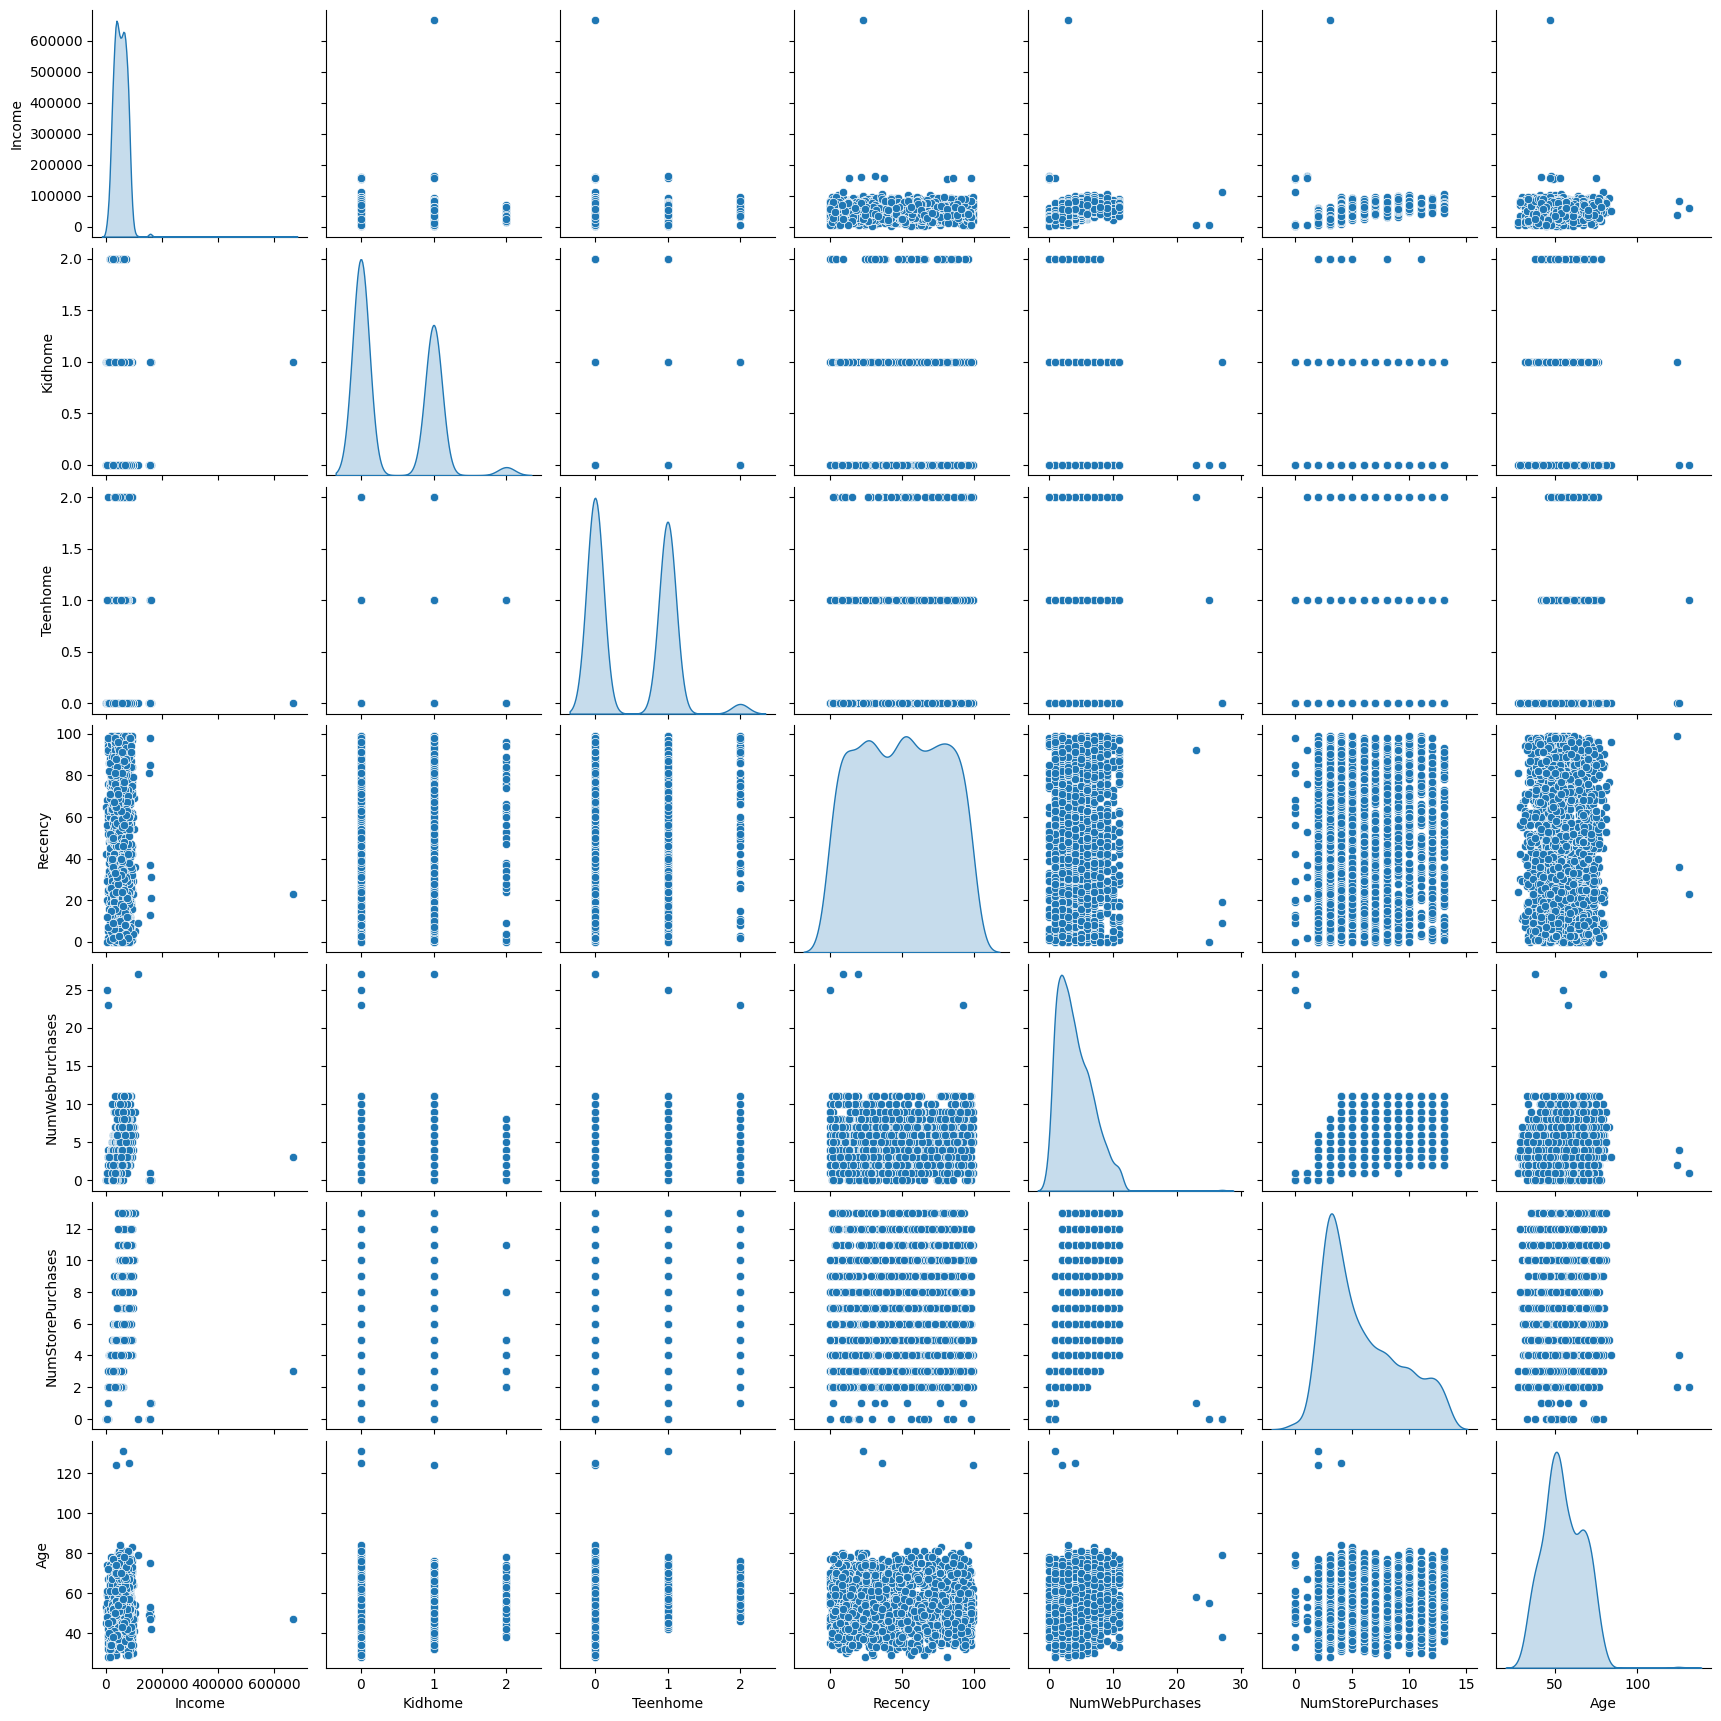

In [2]:
'''Посмотрим сразу на зависимости между некатегориальными значениями. То, где прослеживаются хоть-какие либо зависимости, 
рассмотрим подробнее.'''
import seaborn as sns
import matplotlib.pyplot as plt
df_analysis = df[["Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Recency", "NumWebPurchases","NumStorePurchases", "Age"]]
sns.pairplot(df_analysis, diag_kind="kde")

In [3]:
df_analysis.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumStorePurchases,Age
0,Graduation,Single,58138.0,0,0,58,8,4,67
1,Graduation,Single,46344.0,1,1,38,1,2,70
2,Graduation,Together,71613.0,0,0,26,8,10,59
3,Graduation,Together,26646.0,1,0,26,2,4,40
4,PhD,Married,58293.0,1,0,94,5,6,43


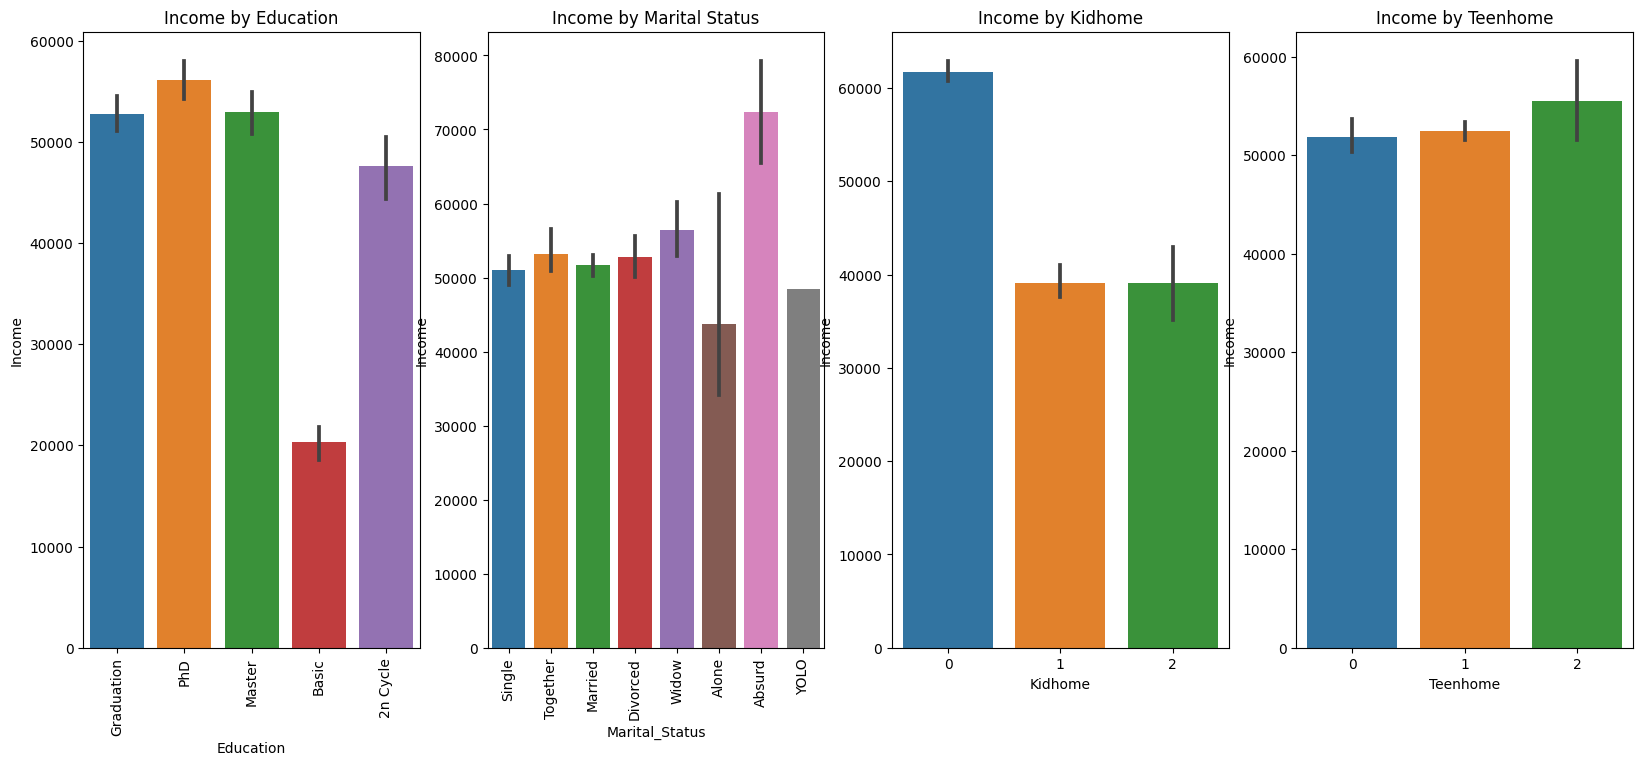

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

sns.barplot(data=df_analysis, x="Education", y="Income", ax=axes[0])
axes[0].set_title('Income by Education')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(data=df_analysis, x="Marital_Status", y="Income", ax=axes[1])
axes[1].set_title('Income by Marital Status')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.barplot(data=df_analysis, x="Kidhome", y="Income", ax=axes[2])
axes[2].set_title('Income by Kidhome')

sns.barplot(data=df_analysis, x="Teenhome", y="Income", ax=axes[3])
axes[3].set_title('Income by Teenhome')

plt.show()

/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


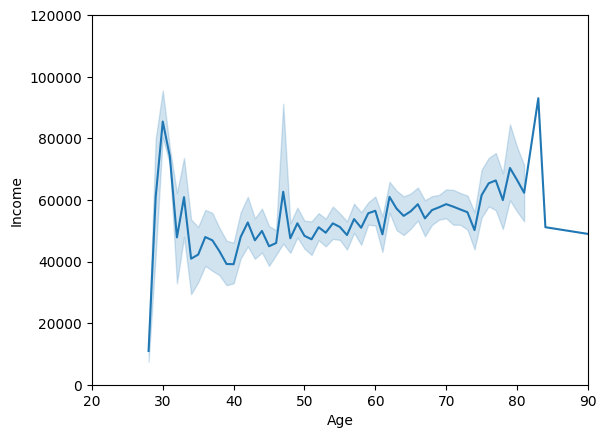

In [5]:
sns.lineplot(data=df_analysis, x="Age", y="Income")
plt.ylim(0, 120000)
plt.xlim(20, 90)
plt.show()

/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

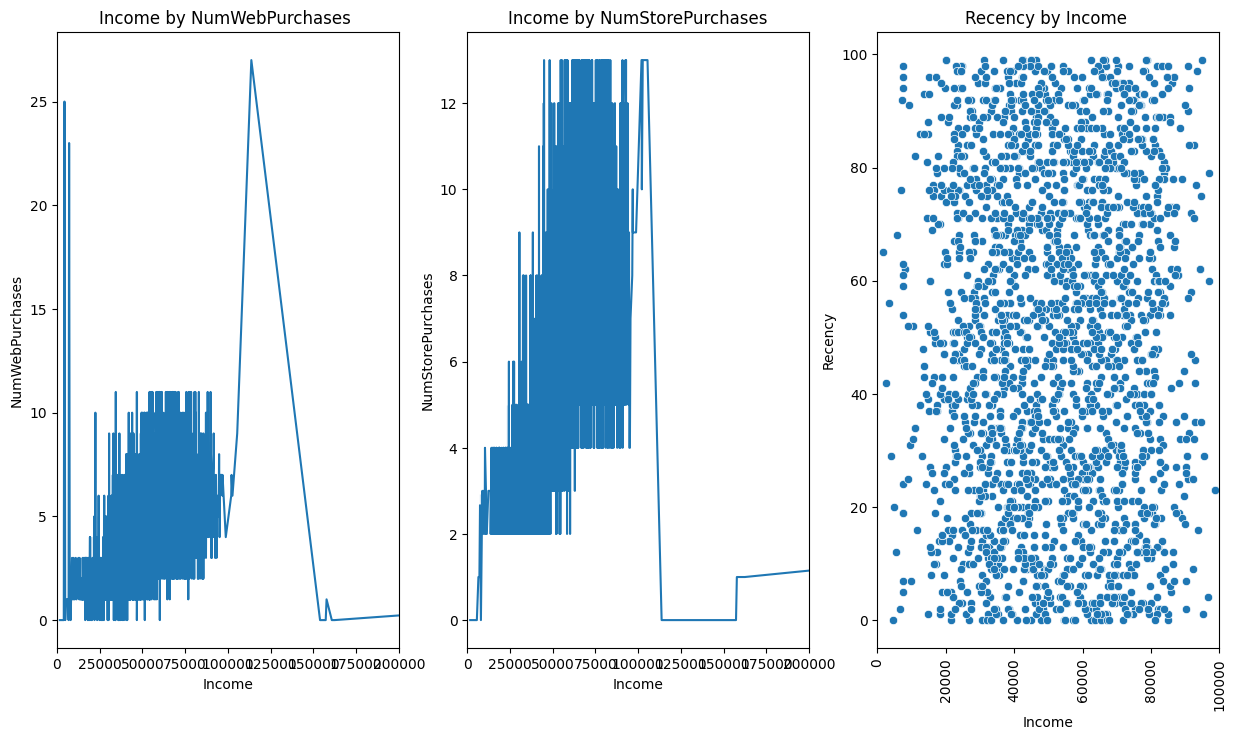

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.lineplot(data=df_analysis, x="Income", y="NumWebPurchases", ax=axes[0])
axes[0].set_title('Income by NumWebPurchases ')
axes[0].set_xlim(0, 200000) 


#sns.scatterplot(data=df_analysis, x="NumStorePurchases", y="Income", ax=axes[1])
sns.lineplot(data=df_analysis, x="Income", y="NumStorePurchases", ax=axes[1])
axes[1].set_title('Income by NumStorePurchases')
axes[1].set_xlim(0, 200000) 

sns.scatterplot(data=df_analysis, x="Income", y="Recency", ax=axes[2])
axes[2].set_title('Recency by Income ')
axes[2].set_xlim(0, 100000) 
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)

plt.show()

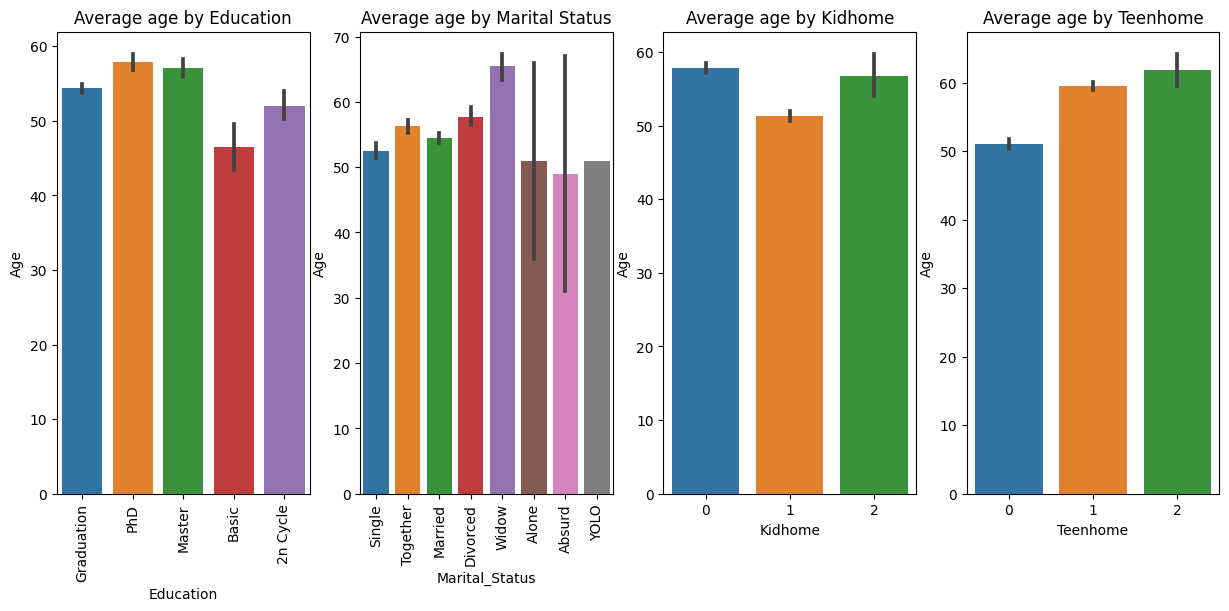

'Kidhome и Income: люди, у которых нет детей, зарабатывают в среднем сильно больше'

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

sns.barplot(data=df_analysis, x="Education", y="Age", ax=axes[0])
axes[0].set_title('Average age by Education')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(data=df_analysis, x="Marital_Status", y="Age", ax=axes[1])
axes[1].set_title('Average age by Marital Status')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.barplot(data=df_analysis, x="Kidhome", y="Age", ax=axes[2])
axes[2].set_title('Average age by Kidhome')

sns.barplot(data=df_analysis, x="Teenhome", y="Age", ax=axes[3])
axes[3].set_title('Average age by Teenhome')

plt.show()
'''Kidhome и Income: люди, у которых нет детей, зарабатывают в среднем сильно больше'''

/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

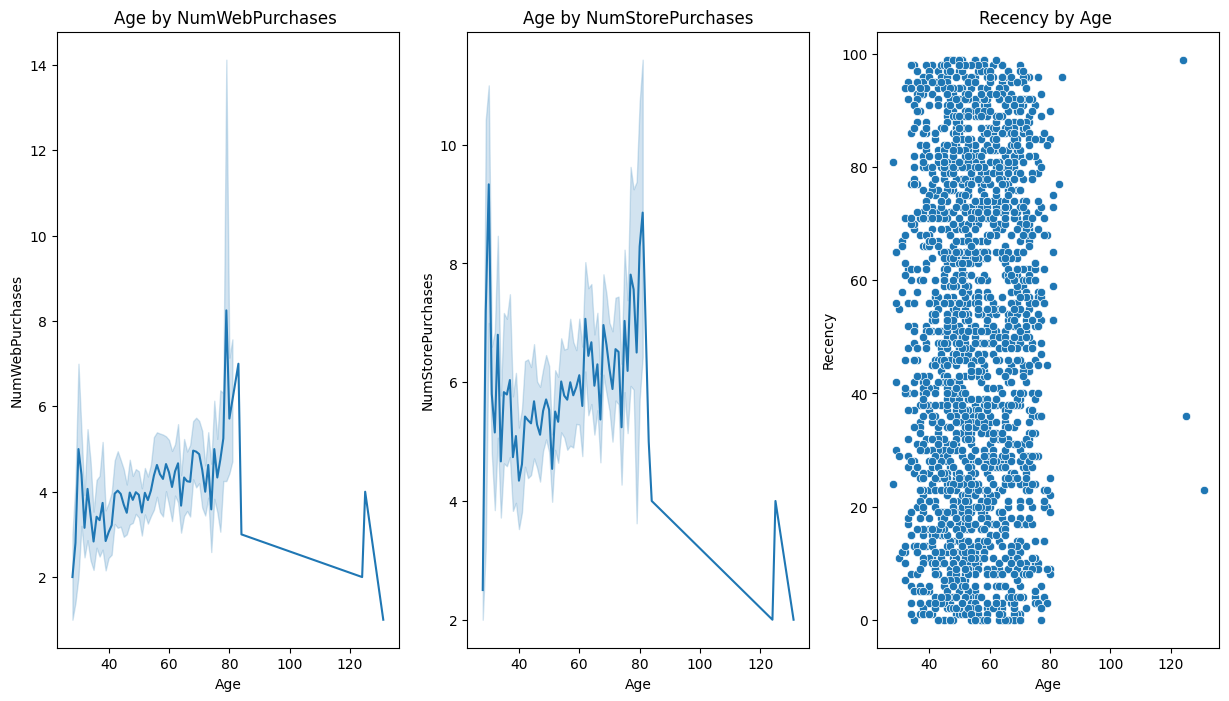

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15, 8))

sns.lineplot(data=df_analysis, x="Age", y="NumWebPurchases", ax=axes[0])
axes[0].set_title('Age by NumWebPurchases ')
#axes[0].set_ylim(0, 200000) 


sns.lineplot(data=df_analysis, x="Age", y="NumStorePurchases", ax=axes[1])
axes[1].set_title('Age by NumStorePurchases')
#axes[1].set_ylim(0, 200000) 

sns.scatterplot(data=df_analysis, x="Age", y="Recency", ax=axes[2])
axes[2].set_title('Recency by Age ')
#axes[2].set_xlim(0, 100000) 

plt.show()

/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

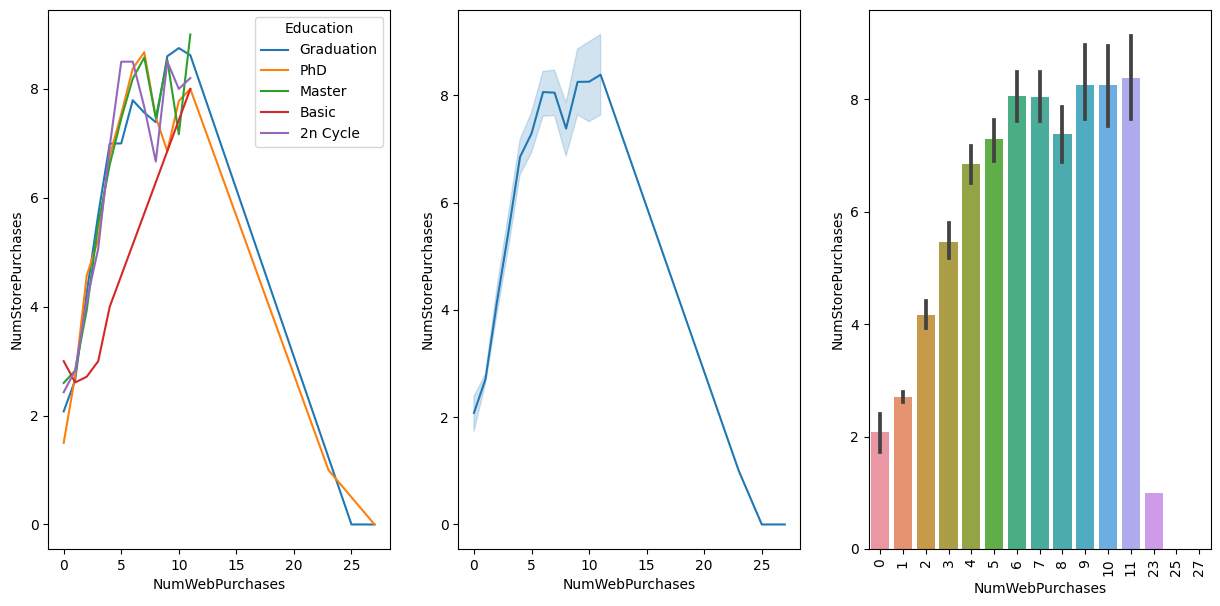

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
sns.lineplot(data=df_analysis, x="NumWebPurchases", y="NumStorePurchases", hue='Education', errorbar=None,  ax=axes[0])
sns.lineplot(data=df_analysis, x="NumWebPurchases", y="NumStorePurchases",  ax=axes[1])
sns.barplot(data=df_analysis, x="NumWebPurchases", y="NumStorePurchases",  ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=90)
plt.show()

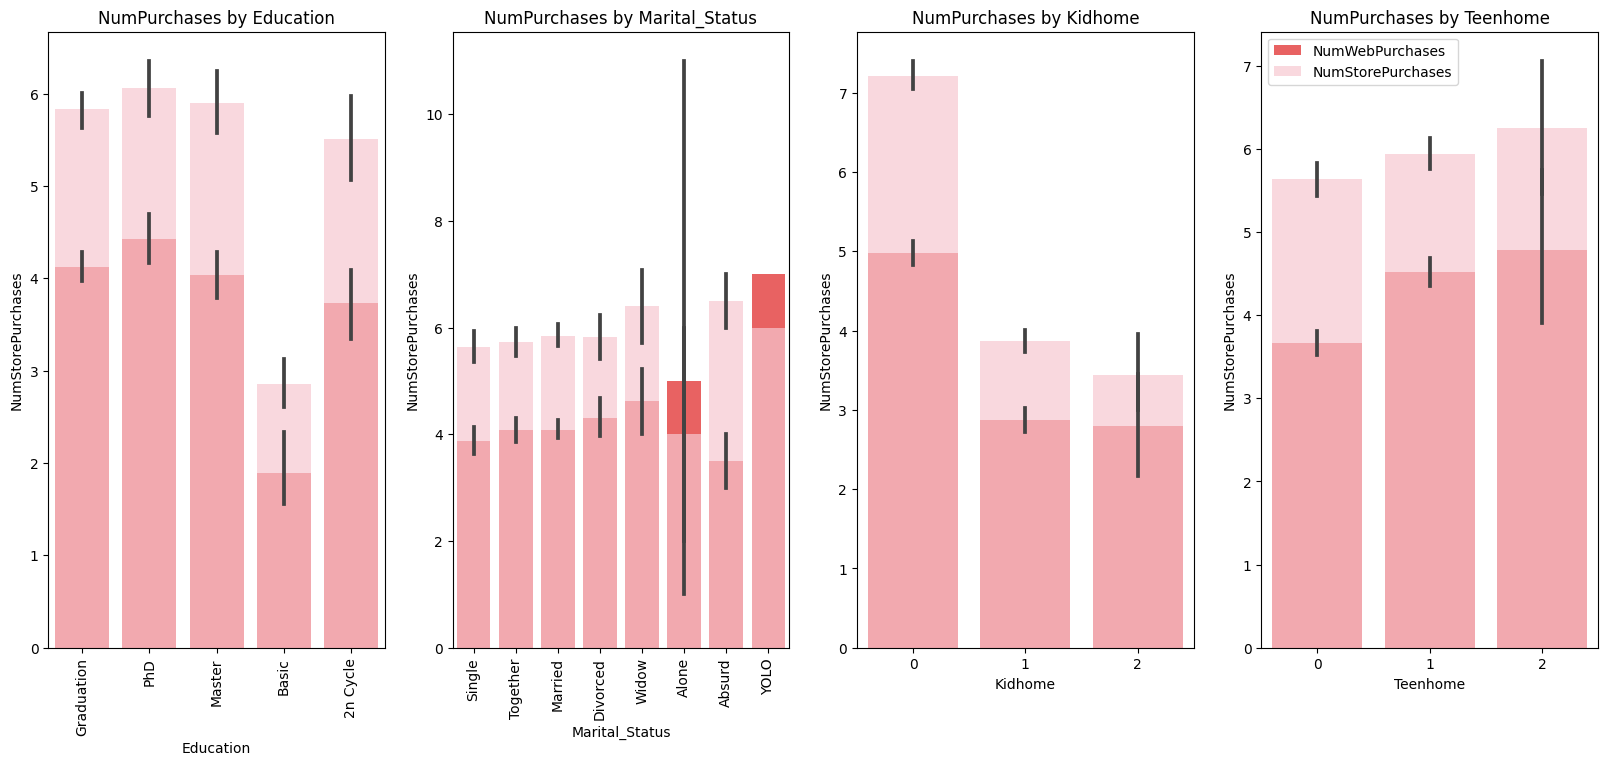

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(20, 8))

sns.barplot(data=df_analysis, x="Education", y="NumWebPurchases", color='red', alpha=0.7, ax=axes[0], label = "NumWebPurchases")
sns.barplot(data=df_analysis, x="Education", y="NumStorePurchases", color='pink', alpha=0.7, ax=axes[0], label = "NumStorePurchases")
axes[0].set_title('NumPurchases by Education')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

sns.barplot(data=df_analysis, x="Marital_Status", y="NumWebPurchases", color='red', alpha=0.7, ax=axes[1], label = "NumWebPurchases")
sns.barplot(data=df_analysis, x="Marital_Status", y="NumStorePurchases", color='pink', alpha=0.7, ax=axes[1], label = "NumStorePurchases")
axes[1].set_title('NumPurchases by Marital_Status')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.barplot(data=df_analysis, x="Kidhome", y="NumWebPurchases", color='red', alpha=0.7, ax=axes[2], label = "NumWebPurchases")
sns.barplot(data=df_analysis, x="Kidhome", y="NumStorePurchases", color='pink', alpha=0.7, ax=axes[2], label = "NumStorePurchases")
axes[2].set_title('NumPurchases by Kidhome')

sns.barplot(data=df_analysis, x="Teenhome", y="NumWebPurchases", color='red', alpha=0.7, ax=axes[3], label = "NumWebPurchases")
sns.barplot(data=df_analysis, x="Teenhome", y="NumStorePurchases", color='pink', alpha=0.7, ax=axes[3], label = "NumStorePurchases")
axes[3].set_title('NumPurchases by Teenhome')

plt.legend()

plt.show()


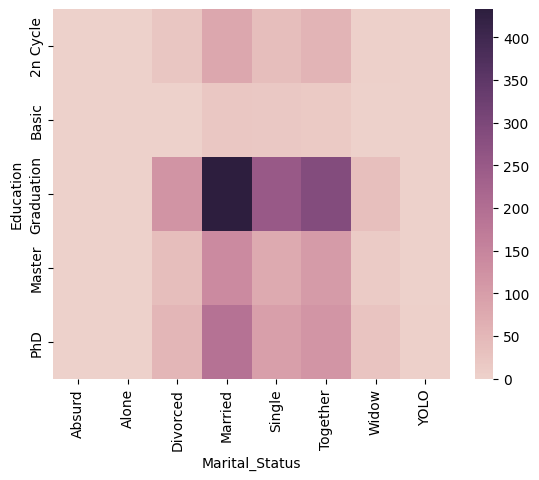

In [11]:
cross_tab = pd.crosstab(df_analysis['Education'], df_analysis['Marital_Status'])
sns.heatmap(cross_tab, annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

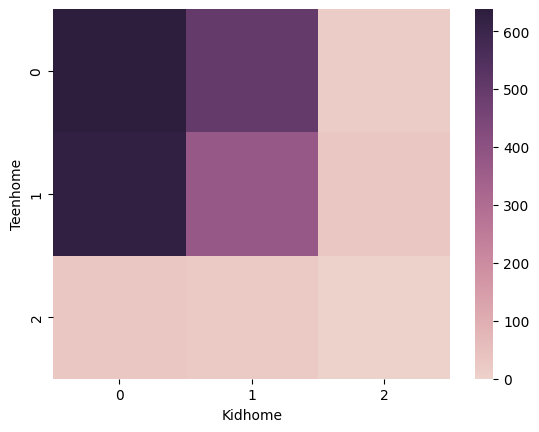

In [12]:
cross_tab = pd.crosstab(df_analysis['Teenhome'], df_analysis['Kidhome'])
sns.heatmap(cross_tab, annot=False, cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

/tmp/ipykernel_311542/3694714059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Kids_and_Teens'] = df_analysis['Kidhome'] + df_analysis['Teenhome']


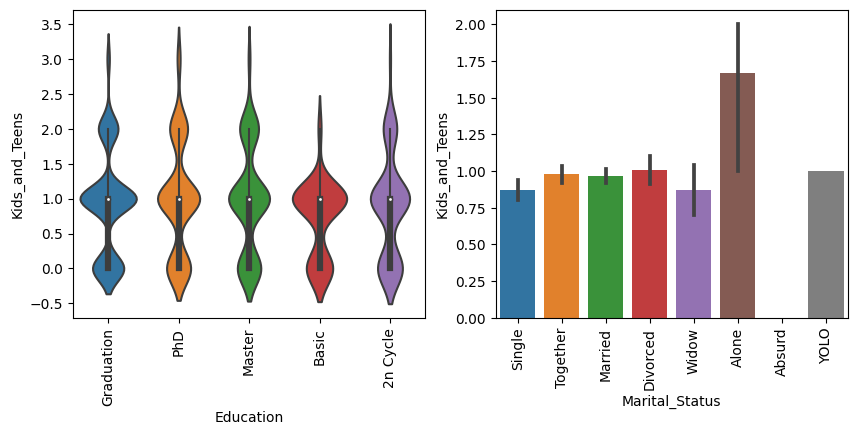

In [13]:
df_analysis['Kids_and_Teens'] = df_analysis['Kidhome'] + df_analysis['Teenhome']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.violinplot(data=df_analysis, x="Education", y="Kids_and_Teens", ax=axes[0])
sns.barplot(data=df_analysis, x="Marital_Status", y="Kids_and_Teens", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
plt.show()

/tmp/ipykernel_311542/955184117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['Purchases'] = df_analysis['NumWebPurchases'] + df_analysis['NumStorePurchases']


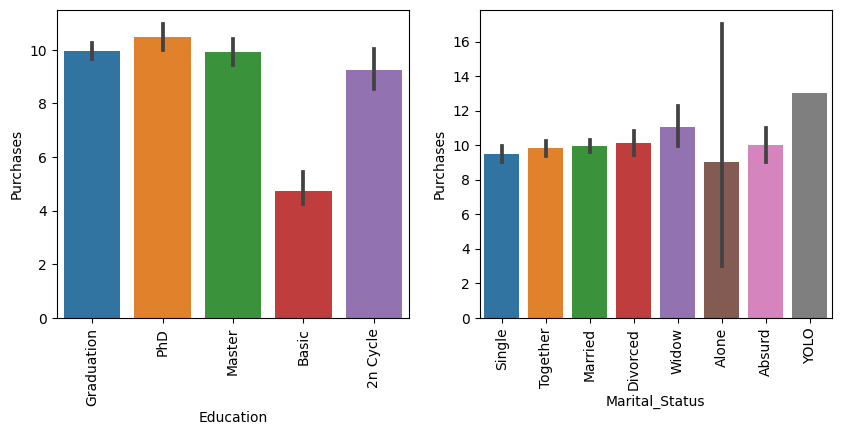

In [14]:
df_analysis['Purchases'] = df_analysis['NumWebPurchases'] + df_analysis['NumStorePurchases']
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=df_analysis, x="Education", y="Purchases", ax=axes[0])
sns.barplot(data=df_analysis, x="Marital_Status", y="Purchases", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
plt.show()

/tmp/ipykernel_311542/4041748162.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["Filtered_purchases"] = df_analysis['Purchases'].apply(lambda x: x if x % 5 == 0 else None)
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anastasia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


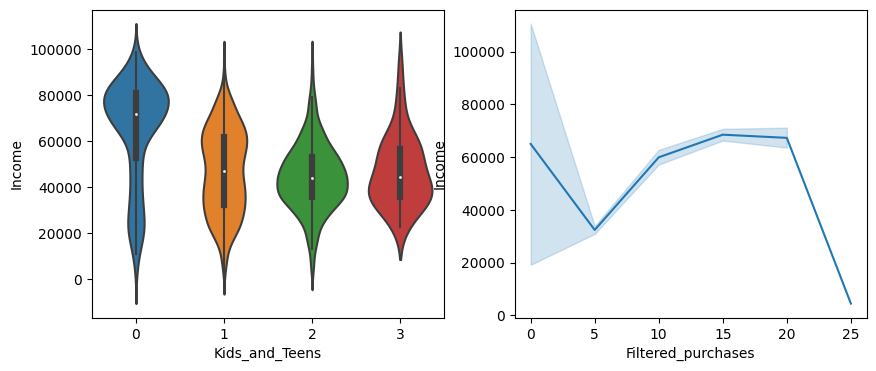

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
filtered_df = df_analysis[df_analysis['Income'] <= 100000]
df_analysis["Filtered_purchases"] = df_analysis['Purchases'].apply(lambda x: x if x % 5 == 0 else None)
sns.violinplot(data=filtered_df, x="Kids_and_Teens", y="Income", ax=axes[0])
sns.lineplot(data=df_analysis, x="Filtered_purchases", y="Income", ax=axes[1])
plt.show()

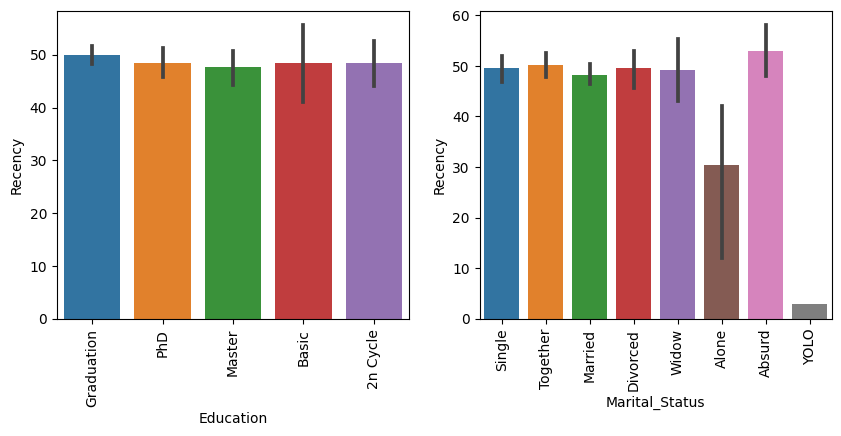

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(data=df_analysis, x="Education", y="Recency", ax=axes[0])
sns.barplot(data=df_analysis, x="Marital_Status", y="Recency", ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
plt.show()

In [17]:
'''
Выводы: прослеживается связь между
        1)Education и NumWebPurchases, NumStorePurchases: люди с образованием Basic делают сильно 
        меньше покупок обоих видов.
        2)Marital_Status и Education: больше всего людей, кто замужем, имеет образование Graduated
        прослеживается
        3) Kidhome и NumWebPurchases, NumStorePurchases: люди, у которых 0 детей, сделали больше всего покупок
        4) Teenhome и NumWebPurchases, NumStorePurchases: люди, у которых 2 подростка, сделали больше всего покупок
        5) NumWebPurchases и NumStorePurchases: с возрастанием онлайн-покупок возрастает и кол-во покупок в магазинах(до определенной отметки, дальше спад)
        6) Education и Income: люди с образованием Basic зарабатывают в среднем сильно меньше, чем люди с образованием лучше.
        7) Teenhome и kidhome: большинство покупателей - либо без детей, либо с одним подростком. 
        8) Marital_Status и Kidhome, Teenhome: у одиноких людей в среднем больше детей и подростов, чем у любых других.
        9) Kidhome и Income: люди, у которых нет детей, зарабатывают в среднем сильно больше
        10) Income и NumWebPurchases, NumStorePurchases: в среднем, чем больше заработок, тем больше покупок.
        11) Age и NumStorePurchases: в среднем, чем старше человек, тем больше у него покупок неонлайн.
        12) Recency и Marital_Status: у одиноких людей кол-во дней с последней покупки сильно больше, чем другие 

''' 

'\nВыводы: прослеживается связь между\n        1)Education и NumWebPurchases, NumStorePurchases: люди с образованием Basic делают сильно \n        меньше покупок обоих видов.\n        2)Marital_Status и Education: больше всего людей, кто замужем, имеет образование Graduated\n        прослеживается\n        3) Kidhome и NumWebPurchases, NumStorePurchases: люди, у которых 0 детей, сделали больше всего покупок\n        4) Teenhome и NumWebPurchases, NumStorePurchases: люди, у которых 2 подростка, сделали больше всего покупок\n        5) NumWebPurchases и NumStorePurchases: с возрастанием онлайн-покупок возрастает и кол-во покупок в магазинах(до определенной отметки, дальше спад)\n        6) Education и Income: люди с образованием Basic зарабатывают в среднем сильно меньше, чем люди с образованием лучше.\n        7) Teenhome и kidhome: большинство покупателей - либо без детей, либо с одним подростком. \n        8) Marital_Status и Kidhome, Teenhome: у одиноких людей в среднем больше детей 